In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import BoxLeastSquares
import scipy.signal
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from lightkurve import search_lightcurve
import courseworkb
import importlib

# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)


<module 'courseworkb' from '/home/omcevoy/AstroCourseworkB/courseworkb.py'>

In [14]:
target =  'Kepler-11'
kepler_dataframe, stellar_data = courseworkb.fetch_kepler_data_and_stellar_info_normalise_entire_curve(target)


In [15]:
cursed_list = []
for i in range(1, 16):

    if i % 2 == 0:    
        print(f"Running iteration {i}")
    kepler_dataframe_tmp, stellar_data_tmp = courseworkb.fetch_kepler_data_and_stellar_info_normalise_entire_curve(target,filter_type='savgol', randomise=True)
    cursed_list.append(kepler_dataframe_tmp)

lightcurve_1 = cursed_list[0]
print(lightcurve_1.head())

Running iteration 2urve segment 62 of 62
Running iteration 4urve segment 62 of 62
Running iteration 6urve segment 62 of 62
Running iteration 8urve segment 62 of 62
         time      flux     error2 of 62
0  260.216066  1.000513  0.000886
1  260.216747  1.000172  0.000886
2  260.217428  1.001533  0.000885
3  260.218109  0.999455  0.000885
4  260.218790  1.000512  0.000884


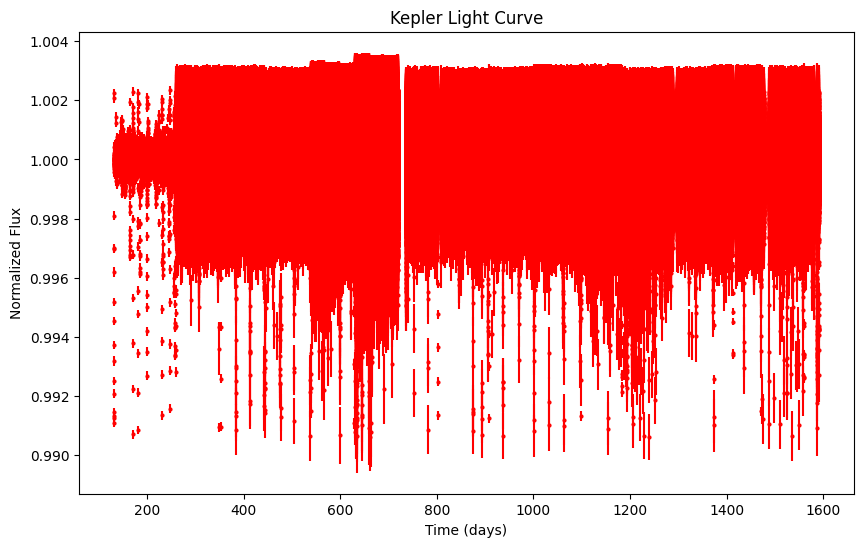

In [16]:
courseworkb.plot_light_curve(kepler_dataframe['time'], kepler_dataframe['flux'], kepler_dataframe['error'])

Running Lomb-Scargle Periodogram Analysis...


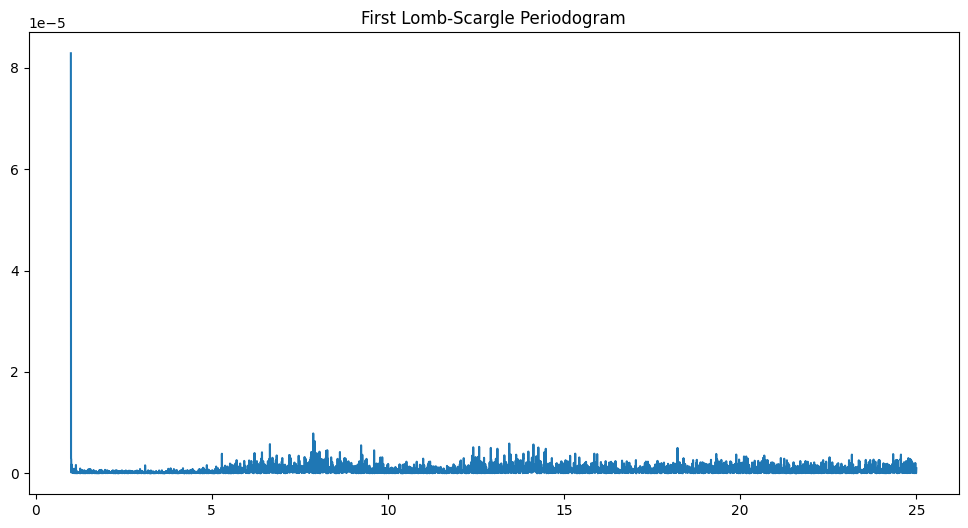

computing second periodogram
List of random light curves present, computing random light curves


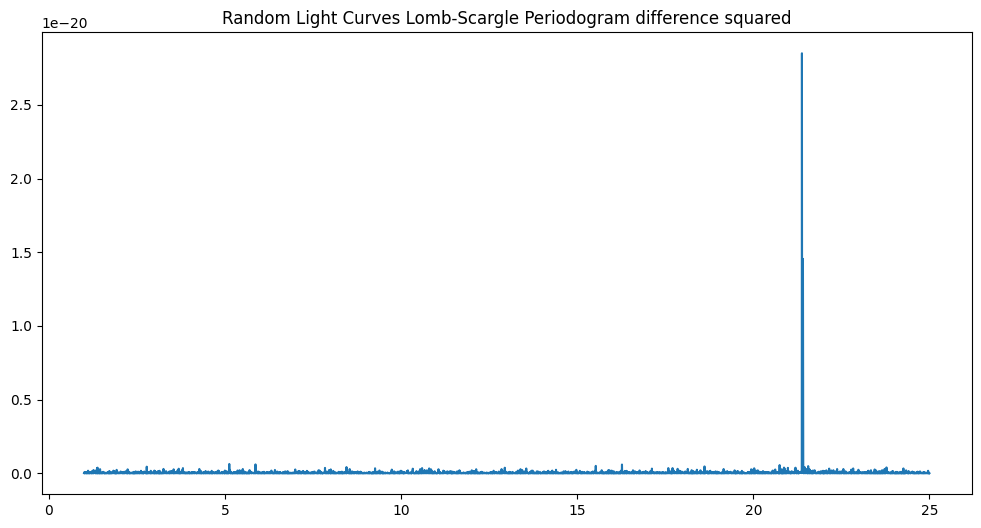

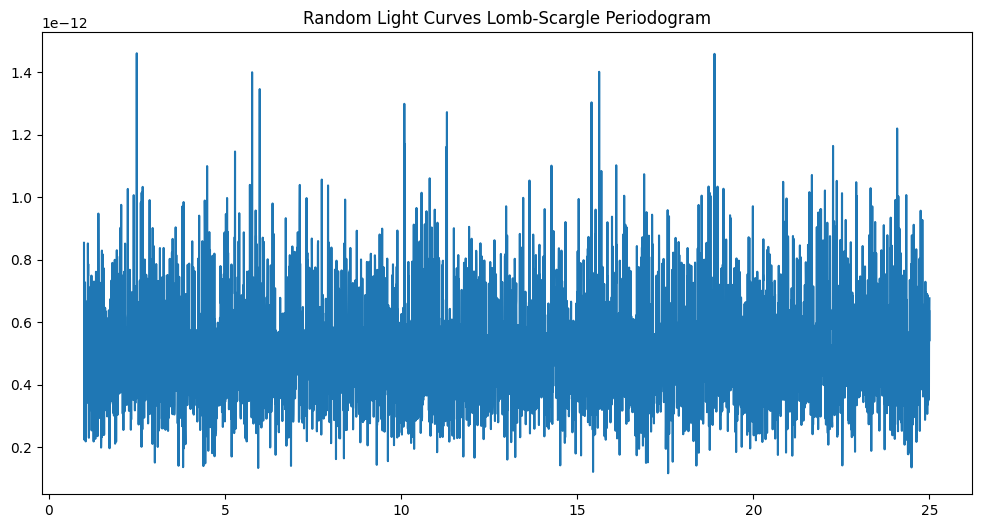

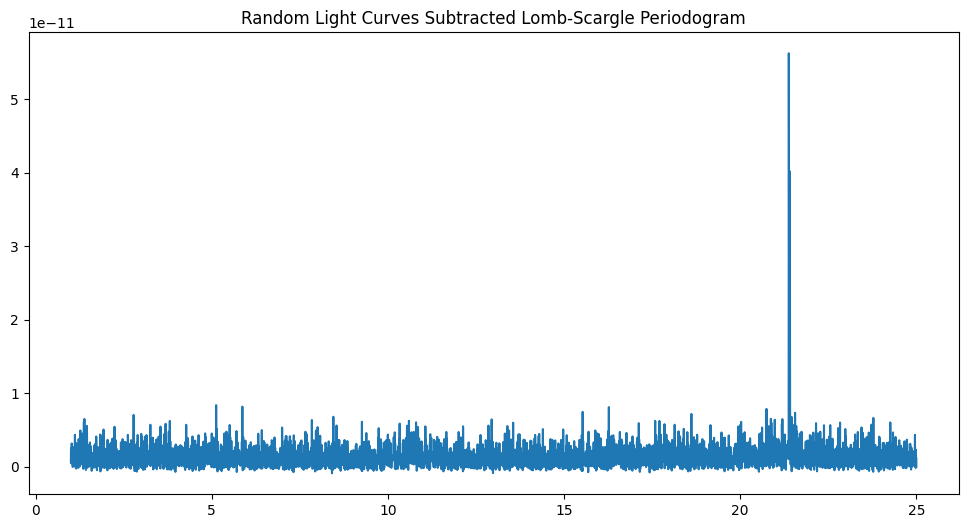

Gradient Threshold: 8.98e-21, Second Derivative Threshold: 2.45e-17


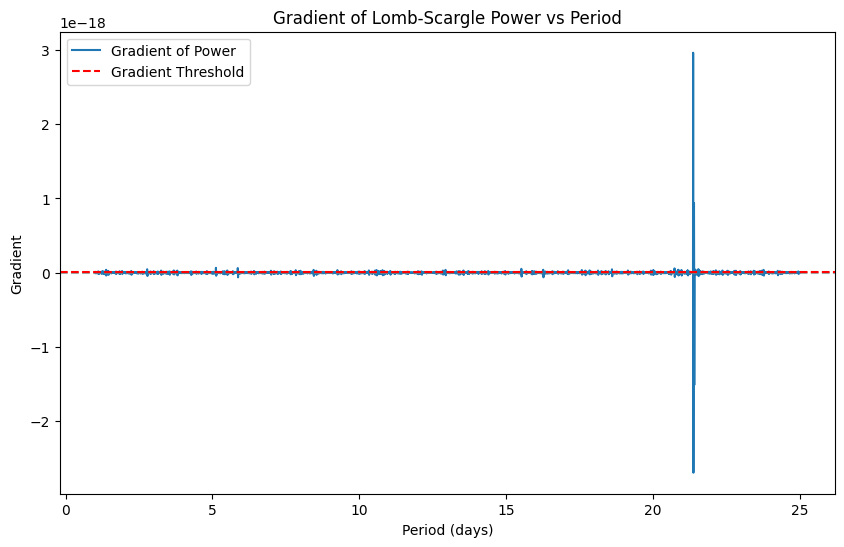

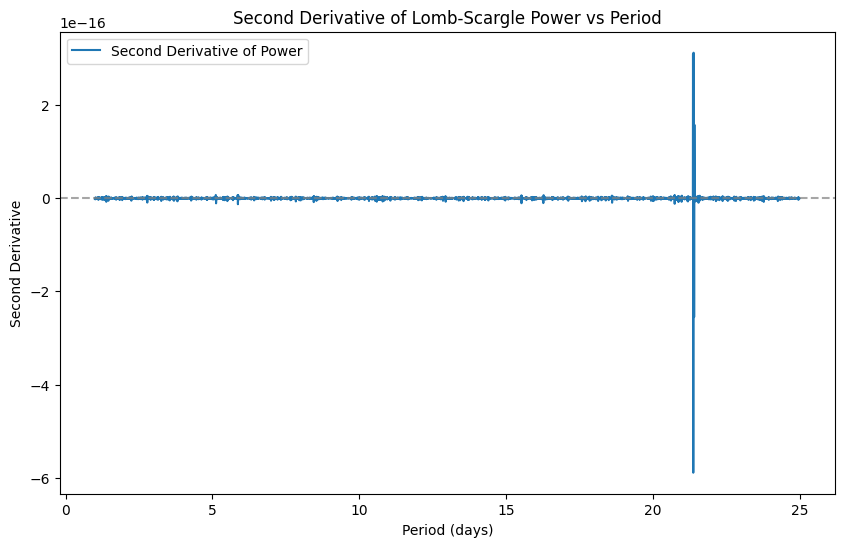

Excluding peaks before period = 1.00 days
Lomb-Scargle Periodogram analysis done


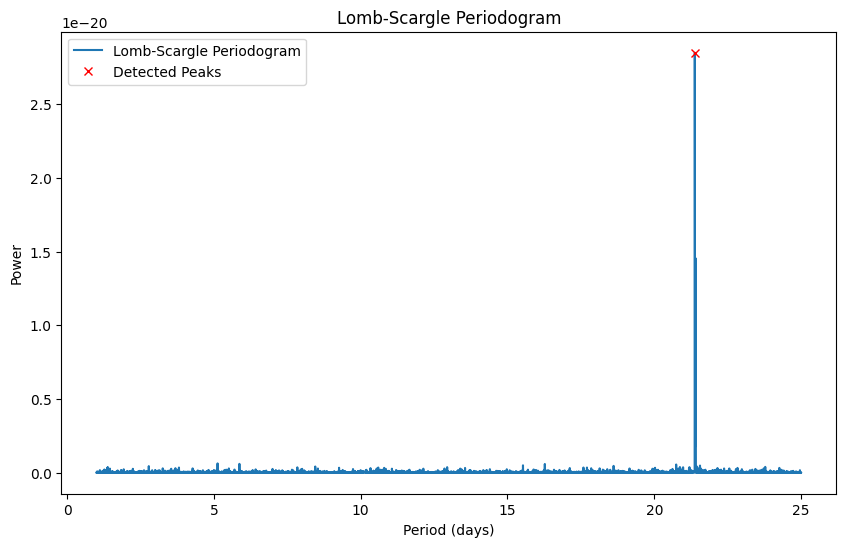

In [17]:
# period_range_zoom =(1,20)
# peaks_of_lightcurve_zoom = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=5000, period_range=period_range_zoom , list_of_random_lightcurves=cursed_list)

period_range_regular = (1 ,25)
peaks_of_lightcurve = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=200000, period_range=period_range_regular,list_of_random_lightcurves=cursed_list)

# add 2 sets of peak to the same array
#peaks_of_lightcurve = np.concatenate((peaks_of_lightcurve_zoom,peaks_of_lightcurve),axis=0)

In [18]:
print(len(peaks_of_lightcurve))
peaks_of_lightcurve_filt = courseworkb.remove_exact_duplicates(peaks_of_lightcurve,0.05, False)
print(len(peaks_of_lightcurve_filt))


results_list_no_filter = courseworkb.analyze_peaks_with_bls(
      kepler_dataframe["time"].values,
      kepler_dataframe["flux"].values,
      kepler_dataframe["error"].values,
      peaks_of_lightcurve_filt,
      10000
)





1
Adding period 21.380 days to the unique results.
1
Analyzing period 21.38 days...
Best Period: 22.686874248597217, Best Duration: 0.20400000000000001, Best Transit Time: 148.4644025879465


In [19]:


print(f"Number of peaks found: {len(results_list_no_filter)}")

results_list = courseworkb.remove_duplicate_periods(results_list_no_filter,0.1,0.5, 0.75)

print(f"Number of peaks found after removing duplicates: {len(results_list)}")


Number of peaks found: 1
Adding period 22.687 days to the unique results.
Adding period 22.687 days to the final results.
Number of peaks found after removing duplicates: 1


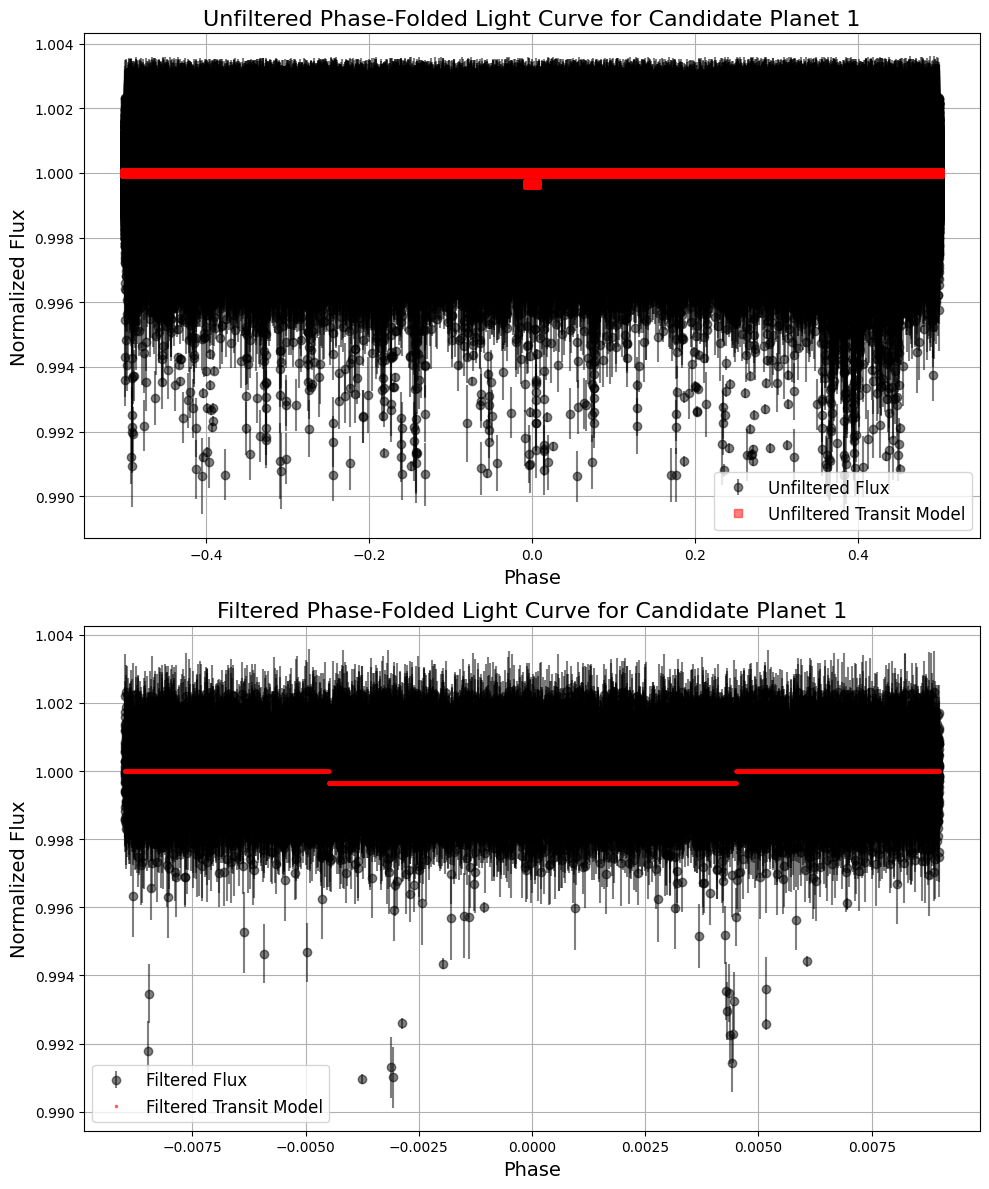

In [20]:
# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)
courseworkb.plot_phase_folded_light_curves(kepler_dataframe,results_list )

In [21]:
courseworkb.summarize_results(results_list,stellar_data)



Detected Planet Candidates:
----------------------------------------
Stellar Radius: 1.046 Solar Radii
Stellar Temperature: 5657 K
----------------------------------------

----------------------------------------
Candidate 1:
  Initial Period = 21.38 days
  Refined Period = 22.69 days
  Transit Depth  = 3.42e-04
  Transit Duration = 0.20 days
  Power = 4335.32
----------------------------------------
Best Transit Candidate: Period = 22.69 days, Depth = 3.42e-04
Estimated Planet Radius: 0.019 Solar Radii
Estimated Planet Radius: 2.109 Earth Radii
Estimated Planet Radius: 0.192 Jupiter Radii
